In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chafiedzafrilian","key":"6683825e0fae70aa194002bd6d35fae6"}'}

In [ ]:
!kaggle --version
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!cat ~/.kaggle/kaggle.json


Kaggle API 1.7.4.5
{"username":"chafiedzafrilian","key":"6683825e0fae70aa194002bd6d35fae6"}

In [ ]:
# ambil dataset
!kaggle datasets download -d kavindavimukthi/meal-plan-and-exercise-schedule-gender-goal-bmi
# unzip
!unzip meal-plan-and-exercise-schedule-gender-goal-bmi.zip -d meal_exercise_data



Dataset URL: https://www.kaggle.com/datasets/kavindavimukthi/meal-plan-and-exercise-schedule-gender-goal-bmi
License(s): CC-BY-SA-4.0
  0% 0.00/217k [00:00<?, ?B/s]
100% 217k/217k [00:00<00:00, 412MB/s]
Archive:  meal-plan-and-exercise-schedule-gender-goal-bmi.zip
  inflating: meal_exercise_data/GYM.csv  


=== 5 Baris Pertama ===
   Gender         Goal   BMI Category  \
0  Female  muscle_gain  Normal weight   
1    Male     fat_burn    Underweight   
2    Male  muscle_gain  Normal weight   
3    Male  muscle_gain     Overweight   
4  Female  muscle_gain  Normal weight   

                                   Exercise Schedule  \
0  Moderate cardio, Strength training, and 5000 s...   
1  Light weightlifting, Yoga, and 2000 steps walking   
2  Moderate cardio, Strength training, and 5000 s...   
3  High-intensity interval training (HIIT), Cardi...   
4  Moderate cardio, Strength training, and 5000 s...   

                                           Meal Plan  BMI  
0  Balanced diet with moderate protein and carboh...   19  
1  High-calorie, protein-rich diet: Whole milk, p...   16  
2  Balanced diet with moderate protein and carboh...   23  
3  Low-carb, high-fiber diet: Avocado, grilled fi...   28  
4  Balanced diet with moderate protein and carboh...   21  

=== Missing Values Per Kolom ==

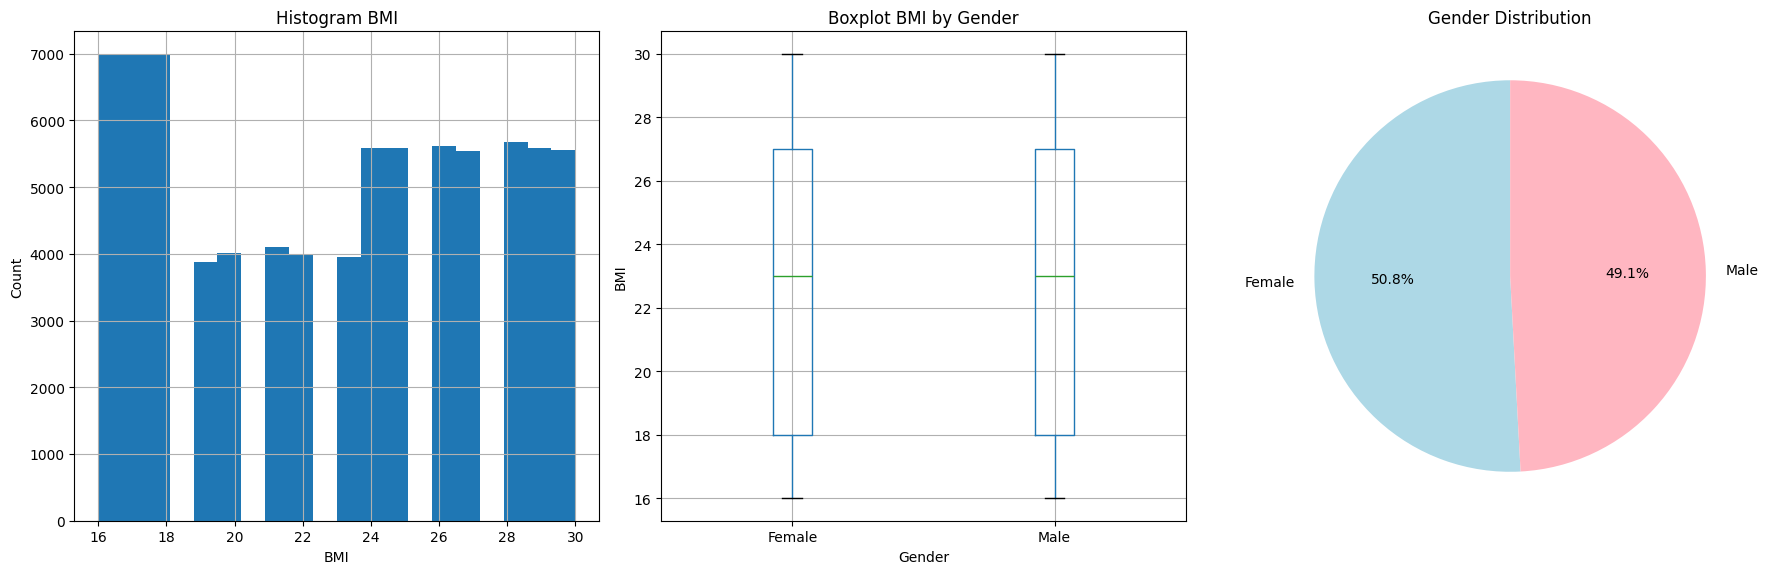

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ganti path ke lokasi file CSV
file_path = "meal_exercise_data/GYM.csv"

# 1. Load data
df = pd.read_csv(file_path)

# 2. 5 baris pertama
print("=== 5 Baris Pertama ===")
print(df.head())

# 3. Jumlah missing values per kolom
print("\n=== Missing Values Per Kolom ===")
print(df.isnull().sum())

# 4. Statistik dasar
print("\n=== Statistik Dasar (Numerik) ===")
print(df.describe())

# Tambahkan median & std dev
print("\n=== Median ===")
print(df.median(numeric_only=True))
print("\n=== Standard Deviation ===")
print(df.std(numeric_only=True))

# 5. Filtering sederhana
filtered = df[(df['Gender'] == 'Male') & (df['Goal'] == 'muscle_gain')]
print("\n=== Filtering: Male & Lose weight ===")
print(filtered.head())

# 6. Visualisasi
# Check if 'BMI' column exists before plotting
if 'BMI' in df.columns:
    plt.figure(figsize=(18, 6))

    # Histogram for BMI
    plt.subplot(1, 3, 1)
    df['BMI'].hist(bins=20)
    plt.title("Histogram BMI")
    plt.xlabel("BMI")
    plt.ylabel("Count")

    # Boxplot BMI by Gender
    plt.subplot(1, 3, 2)
    df.boxplot(column='BMI', by='Gender', ax=plt.gca())
    plt.title("Boxplot BMI by Gender")
    plt.suptitle("")
    plt.xlabel("Gender")
    plt.ylabel("BMI")

    # Pie chart for Gender distribution
    plt.subplot(1, 3, 3)
    df['Gender'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'lightpink']
    )
    plt.title("Gender Distribution")
    plt.ylabel("") # Remove default y-label from pie chart


    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'BMI' tidak ditemukan di dataset")